# Projet 3
# Concevez une application au service de la santé publique

# Importer les données nettoyées

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_food_clean = pd.read_csv('df_cleaned_hyp1.csv', dtype = {'code': 'str'}, low_memory=False) 

In [2]:
# Lire toutes les colonnes 
pd.set_option('display.max_columns', None)

# Observer échantillon 
df_food_clean.sample(4)

,Unnamed: 0,code,product_name,quantity,packaging,brands,categories,labels,countries,allergens,serving_size,serving_quantity,additives_n,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,main_category,main_category_en,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
359005,1299642,8436551866895,Queso de Oveja Anyenc,200 g,NaN,casa ametller,NaN,NaN,España,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,431.0,1803.0,35.00,25.00,NaN,NaN,2.6,0.8,NaN,26.00,1.80,0.72,NaN,NaN,NaN,NaN,NaN
672621,121801,0047502441221,"Rojo's, Savory Black Bean 5 Layer Dip",NaN,NaN,Simply Fresh Foods Inc.,"Groceries, Sauces, Dips",NaN,United States,en:milk,2 Tbsp (30 g),30.0,11.0,4.0,c,4.0,Fat and sauces,Dressings and sauces,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...","Simply Fresh Foods, Inc.",en:dips,Dips,100.0,418.0,6.67,3.33,0.0,0.017,10.0,0.0,3.3,3.33,1.25,0.50,0.0001,0.008,0.067,0.0024,4.0
277281,614456,3257630012706,Brandade de morue,200g,Verre,Coudène,"Produits de la mer, Poissons, Plats préparés, ...",NaN,France,"en:fish,en:milk",NaN,NaN,1.0,12.0,d,4.0,Composite foods,One-dish meals,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","To be checked,Complete,Nutrition facts complet...",NaN,en:preparations-made-from-fish-meat,Preparations-made-from-fish-meat,452.0,1891.0,47.00,4.00,NaN,NaN,1.5,0.5,NaN,5.70,1.00,0.40,NaN,NaN,NaN,NaN,12.0
47823,1163921,8001120927057,Billes de céréales au cacao biologiques,NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,379.0,1586.0,2.00,0.70,NaN,NaN,80.0,20.0,NaN,8.30,0.60,0.24,NaN,NaN,NaN,NaN,NaN


In [3]:
# Enlever 'Unnamed: 0'
df_food_clean.drop(columns=['Unnamed: 0'], inplace=True)

# Observer échantillon 
df_food_clean.sample(4)

,code,product_name,quantity,packaging,brands,categories,labels,countries,allergens,serving_size,serving_quantity,additives_n,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,main_category,main_category_en,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
129755,7443000860008,Mermelada Guayaba Tricopilia Bolsa 250 GR,NaN,NaN,NaN,NaN,NaN,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,300.0,1255.0,0.0,0.0,NaN,NaN,75.0,70.0,NaN,0.0,0.00,0.000,NaN,NaN,NaN,NaN,NaN
45752,3234510068169,Elsässer Flammkuchen,NaN,NaN,NaN,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,237.0,992.0,10.0,4.5,NaN,NaN,29.0,3.5,NaN,7.1,1.60,0.640,NaN,NaN,NaN,NaN,NaN
401609,3564706562509,Acti fidus céréales amande noisette noix,NaN,NaN,NaN,NaN,NaN,en:fr,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,98.0,410.0,4.2,2.1,NaN,NaN,9.6,9.3,NaN,4.0,0.10,0.040,NaN,NaN,NaN,NaN,NaN
224342,3665287002375,Poularde farcie,NaN,NaN,NaN,NaN,NaN,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,207.0,866.0,14.0,4.8,NaN,NaN,2.1,1.6,NaN,18.0,0.69,0.276,NaN,NaN,NaN,NaN,NaN


In [4]:
# Travailler sur une copie
df = df_food_clean

# Rappel Hypothèses

## Hypothèse 1 :
    
- H0 = nutriscore et nova_group sont indépendants 

- H1 = nutriscore et nova_group sont corrélés


Si le nutriscore et le nova_group ne sont pas corrélés, 
il serait intéressant de créer une application qui calcule un score prennant en compte le nutriscore_score et le novagroup afin d’avoir une vision globale de la qualité des produits. 
En effet, un produit peut être très transformé mais conserver une valeur nutritionnelle correcte et vice versa. 

Proposition d’application liée : 
Application qui calcule un score globale avec le nutriscore_score et le nova_group.

Colonnes d’intérêt : 
'nutrition-score-fr_100g', 'nutriscore_score', 'nutriscore_grade', 'nova_group’.


## Hypothèse 2 :

- H0 = rapport fat sat+trans /fat total et nutriscore sont indépendants 

- H1 = rapport fat sat+trans /fat total et nutriscore sont corrélés

Si rapport (saturated-fat + trans-fat )/fat total n'est pas corrélé avec le nutriscore, il serait intéressant de rajouter ce calcul.
Le nutriscore prend en compte les sucres et les graisses. 
Cependant, le ratio (saturated-fat + trans-fat )/fat total a été observé comme fortement corrélés à l'apparition de maladies cardiovasculaires.

Proposition d’application liée : 
Application qui calcule le ratio d’AG saturés ou avec des insaturations de type trans- sur le poids total en lipides

Colonnes d’intérêt : 
'saturated-fat_100g', 'trans-fat_100g', 'fat_100g', 'nutriscore_score', 'nutriscore_grade' 

# Analyses univariées

## Variables quantitatives

In [5]:
# Afficher les colonnes avec des variables numériques

for col in df.select_dtypes('float'):
    print(col)

serving_quantity
additives_n
nutriscore_score
nova_group
energy-kcal_100g
energy_100g
fat_100g
saturated-fat_100g
trans-fat_100g
cholesterol_100g
carbohydrates_100g
sugars_100g
fiber_100g
proteins_100g
salt_100g
sodium_100g
vitamin-a_100g
vitamin-c_100g
calcium_100g
iron_100g
nutrition-score-fr_100g


NB : Certaines données codées en float ne sont pas quantitatives, tel que le 'nova_group'.

In [6]:
# Afficher un df avec uniquement les variables quantitatives

var_quantitatives_analyse = df.select_dtypes('float')
var_quantitatives_analyse.drop(['nova_group', 'nutriscore_score', 'nutrition-score-fr_100g'], axis=1)

,serving_quantity,additives_n,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g
0,6.0,2.0,517.0,2170.0,28.30,8.33,0.0,0.00833,61.70,45.00,1.67,5.00,0.4230,0.16900,0.000025,0.003,0.0167,0.0015
1,26.0,3.0,450.0,1883.0,16.92,5.00,0.0,NaN,65.38,9.23,3.08,8.85,1.9812,0.79248,NaN,NaN,NaN,NaN
2,26.0,3.0,450.0,1880.0,16.50,5.00,NaN,NaN,65.40,8.85,3.08,8.85,1.9500,0.78200,NaN,NaN,NaN,NaN
3,30.0,2.0,363.0,1520.0,5.33,1.00,NaN,NaN,70.00,19.30,76.70,10.30,0.0703,0.02810,NaN,NaN,NaN,NaN
4,26.0,3.0,465.0,1950.0,18.50,5.38,NaN,NaN,65.40,8.08,2.31,8.46,1.8900,0.75400,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
962500,250.0,1.0,36.0,152.0,2.00,0.30,NaN,NaN,0.80,0.70,0.60,3.50,0.0300,0.01200,NaN,NaN,0.1200,NaN
962501,NaN,NaN,395.0,1653.0,3.60,2.10,NaN,NaN,82.50,22.40,NaN,7.20,0.6000,0.24000,NaN,NaN,NaN,NaN
962502,220.0,NaN,109.0,456.0,6.60,3.20,NaN,NaN,8.20,4.50,NaN,4.00,1.0000,0.40000,NaN,NaN,NaN,NaN
962503,NaN,1.0,392.0,1626.0,32.00,20.00,NaN,NaN,0.00,0.00,NaN,26.00,1.9000,0.76000,NaN,NaN,NaN,NaN


serving_quantity
moy:
 88.13975830097033
med:
 50.0
mod:
 0    28.0
dtype: float64
var:
 2955046.330452464
ect:
 1719.0248196150235
skw:
 552.8871320943949
kur:
 313848.2599762103
additives_n
moy:
 2.0966658609573967
med:
 1.0
mod:
 0    0.0
dtype: float64
var:
 8.719389799463482
ect:
 2.9528612902511155
skw:
 2.3486165632340037
kur:
 7.878481870403613
nutriscore_score
moy:
 9.254969751039045
med:
 10.0
mod:
 0    14.0
dtype: float64
var:
 79.10717817069956
ect:
 8.894221616909462
skw:
 0.059803806921271685
kur:
 -0.9552520995663936
nova_group
moy:
 3.4730552843260334
med:
 4.0
mod:
 0    4.0
dtype: float64
var:
 0.8455400694734899
ect:
 0.9195325276864815
skw:
 -1.8034094287956925
kur:
 2.141584229683022
energy-kcal_100g
moy:
 279.9242641608901
med:
 275.0
mod:
 0    0.0
dtype: float64
var:
 34615.444814198236
ect:
 186.05226366319286
skw:
 0.4575519784672913
kur:
 -0.19678837792279813
energy_100g
moy:
 1170.8869928272263
med:
 1151.0
mod:
 0    0.0
dtype: float64
var:
 605644.7221533

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).


saturated-fat_100g
moy:
 5.147797542888169
med:
 2.0
mod:
 0    0.0
dtype: float64
var:
 57.95914380741842
ect:
 7.613090292871773
skw:
 3.180659770689517
kur:
 19.80810588387996


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

trans-fat_100g
moy:
 0.043898993508171544
med:
 0.0
mod:
 0    0.0
dtype: float64
var:
 1.1129273415316394
ect:
 1.0549537153504127
skw:
 198.30003833148183
kur:
 62161.00730983802


RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

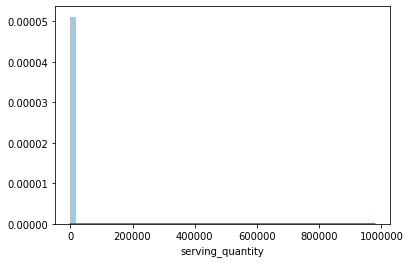

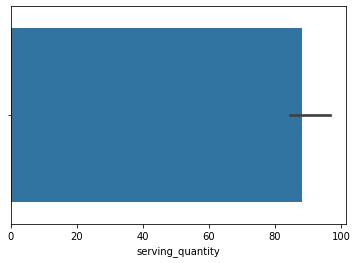

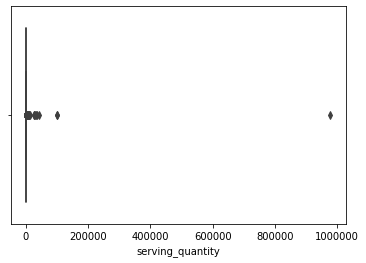

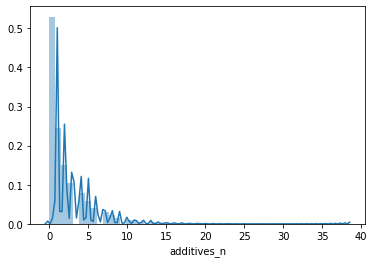

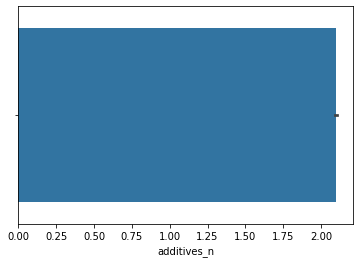

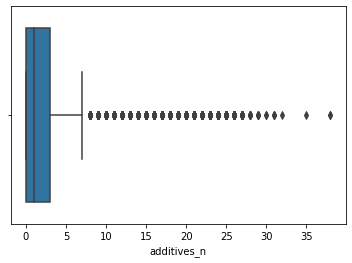

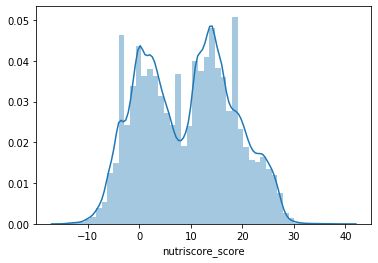

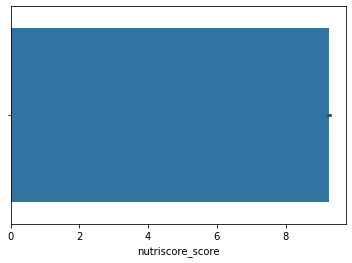

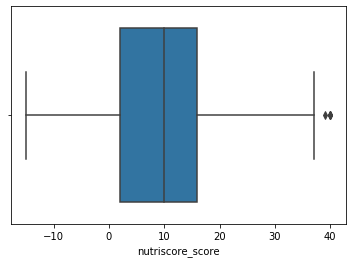

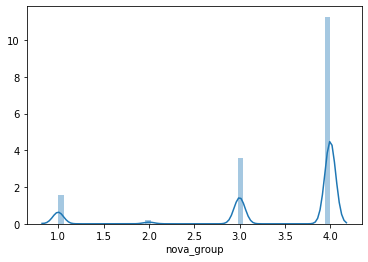

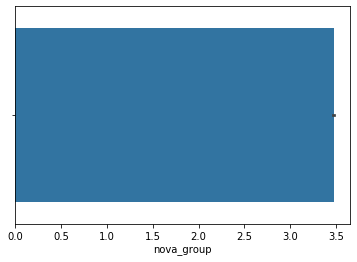

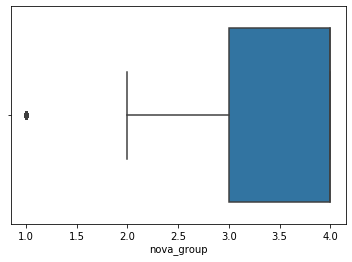

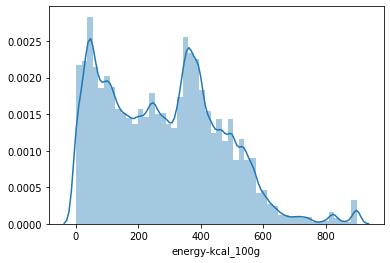

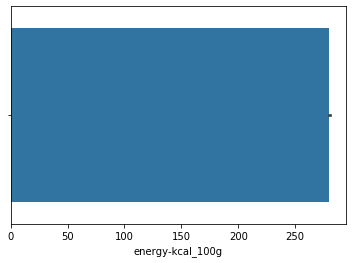

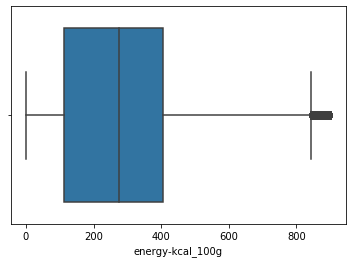

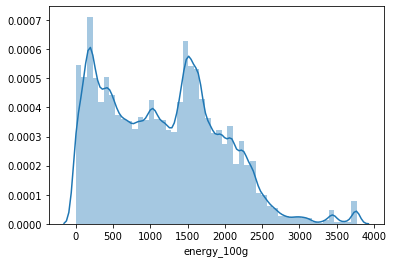

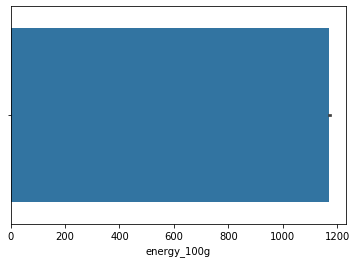

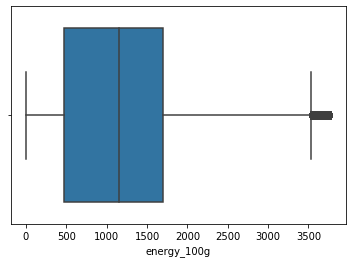

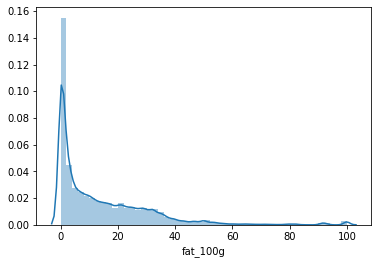

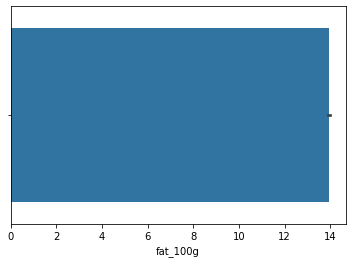

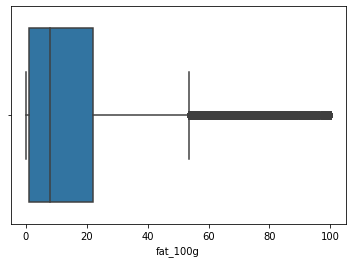

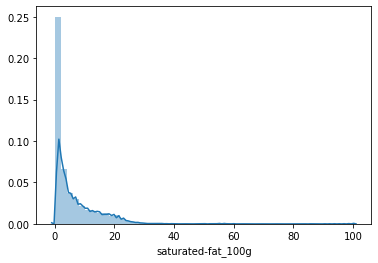

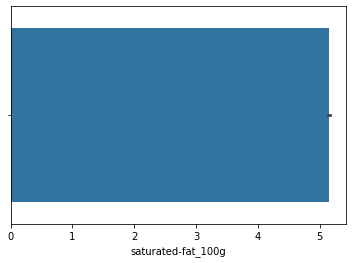

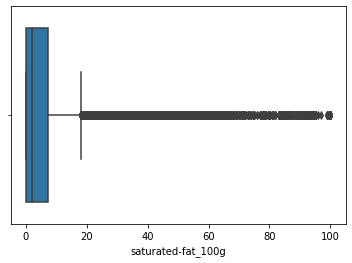

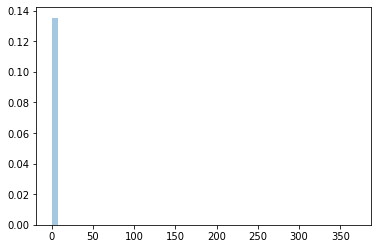

In [7]:
# Créer une fonction pour étudier les variables quantitatives

def an_univariees_quant (df, col_name_quant):
    valeurs_col_quant = df[col_name_quant]
    
    # Mesure de Tendance Centrale
    print('moy:\n',df[col_name_quant].mean())
    print('med:\n',df[col_name_quant].median())
    print('mod:\n',df[col_name_quant].mode())
    
    # Mesure de Dispersion 
    print("var:\n",df[col_name_quant].var(ddof=0))
    print("ect:\n",df[col_name_quant].std(ddof=0))
    
    # Mesure de Forme 
    print("skw:\n",df[col_name_quant].skew())
    print("kur:\n",df[col_name_quant].kurtosis())
    
    #Besoin de recréer une nouvelle figure
    plt.figure()
    sns.distplot(valeurs_col_quant)
    plt.figure()
    sns.barplot(valeurs_col_quant)
    plt.figure()
    sns.boxplot(valeurs_col_quant)
    return valeurs_col_quant


# Appliquer la fonction à chaque variable quantitative 

for col_name_quant in var_quantitatives_analyse: 
    print(col_name_quant)
    an_univariees_quant(df, col_name_quant) 
    

### Visualisation des différents nutriments 

In [8]:
# Créer une liste avec les nutriments d'intérêt

nutriments_100g = ['fat_100g',
'saturated-fat_100g',
'trans-fat_100g',
'cholesterol_100g',
'carbohydrates_100g',
'sugars_100g',
'fiber_100g',
'proteins_100g',
'salt_100g',
'sodium_100g',
'vitamin-a_100g',
'vitamin-c_100g',
'calcium_100g',
'iron_100g']

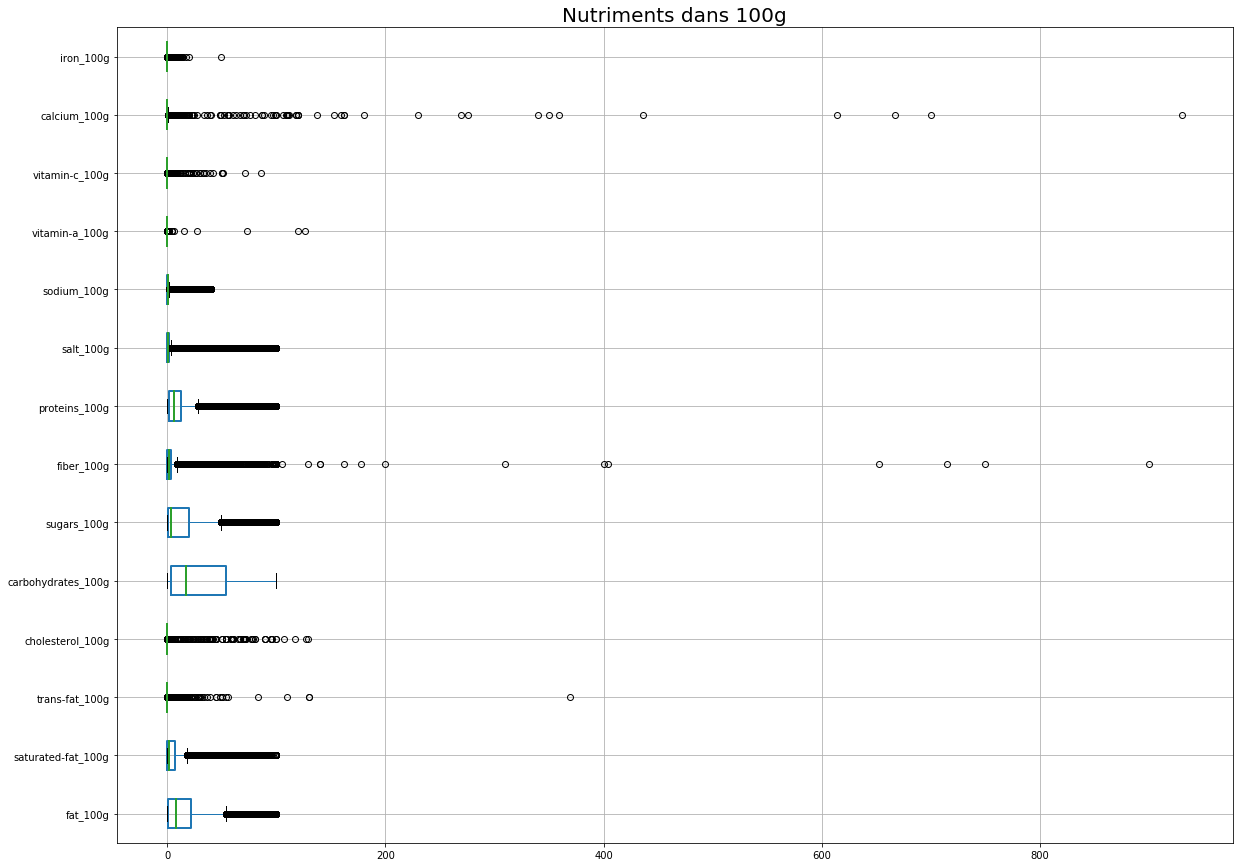

In [9]:
# Créer un graphique avec des boxplots dans matplotlib

# Taille
plt.figure(figsize=(20,15))

# Couleurs
boxprops = dict(linestyle='-', linewidth=2, color='b')
medianprops = dict(linestyle='-', linewidth=2, color='r')

# Titre
plt.title('Nutriments dans 100g', size = 20)

# Figure
df.boxplot(column = nutriments_100g, vert=False, 
           boxprops=boxprops, medianprops=medianprops)

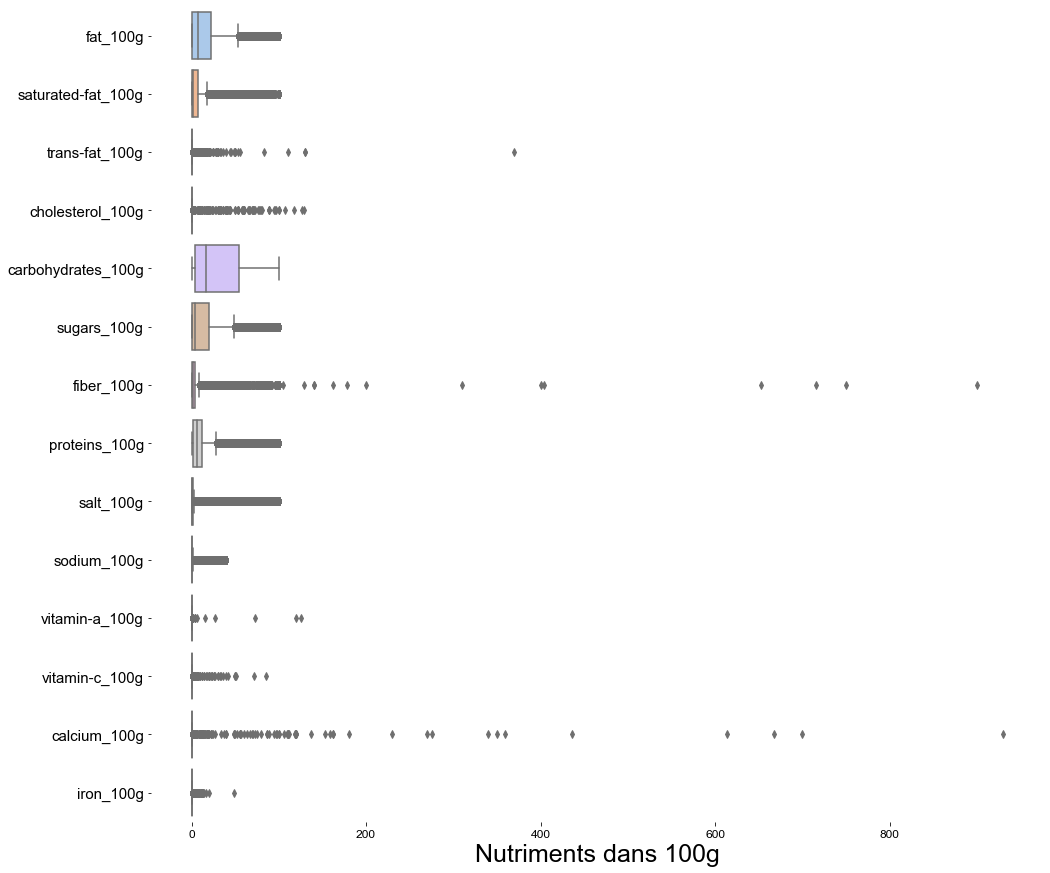

In [10]:
# Créer un graphique avec des boxplots dans seaborn

# Taille
plt.subplots(figsize=(16, 15))

# Style 
sns.set_style('whitegrid')

# Couleurs
sns.set_color_codes('pastel')

# Figure
ax = sns.boxplot(data=df[nutriments_100g],orient="h", palette='pastel')
    
# Titre en bas / x label
plt.xlabel('Nutriments dans 100g', size=25)

# Taille des labels x
ax.set(xlim=None, ylabel='')
ax.tick_params(axis='x', labelsize=12)
    
# Taille des labels y 
ax.tick_params(axis='y', labelsize=15)
sns.despine(left=True, bottom=True)

Observations : Nous constatons la présence d'outliers pour certains nutriments. Leur mesure est supérieure à 100g dans 100g. C'est normal. Nous n'avons nettoyé que les outliers des nutriments en lien direct avec le calcul du nutriscore (à l'exception des fibres - cf notebook 'Exploration'.

## Variables qualitatives

In [11]:
# Afficher les colonnes avec des variables non numériques

for col in df.select_dtypes('object'):
    print(col)

code
product_name
quantity
packaging
brands
categories
labels
countries
allergens
serving_size
nutriscore_grade
pnns_groups_1
pnns_groups_2
states
states_tags
states_en
brand_owner
main_category
main_category_en


In [12]:
# Créer une liste avec les variables qualitatives

# Rajout de la variable 'nova_group' à la liste précédente 

var_qualitatives_analyse=['nova_group', 
                          'nutriscore_grade',
                          'quantity',
                          'categories',
                          'countries',
                          'allergens',
                          'serving_size',
                          'pnns_groups_1',
                          'pnns_groups_2',
                          'states',
                          'states_tags',
                          'states_en',
                          'main_category',
                          'main_category_en'
                         ]


In [13]:
# Créer une fonction pour étudier les variables qualitatives

def an_univariees_qual (df, col_name):        
    # Fréquences
    effectifs = df[col_name].value_counts()
    modalites = effectifs.index # l'index de effectifs contient les modalités  
    # création du tableau à partir des modalités
    tab = pd.DataFrame(modalites, columns = [col_name]) 
    tab['n'] = effectifs.values
    tab['f'] = tab['n'] / len(df) # len(data) renvoie la taille de l'échantillon
    
    # Fréquences cumulées
    tab = tab.sort_values(col_name) # tri des valeurs de la variable X (croissant)
    tab['F'] = tab['f'].cumsum() # cumsum calcule la somme cumulée
    
    # Imprimer tableau
    print(tab)
    #return tab

    
# Appliquer la fonction à chaque variable qualitative 

for col_name in var_qualitatives_analyse: 
    an_univariees_qual(df, col_name) 

   nova_group       n         f         F
2         1.0   38778  0.040289  0.040289
3         2.0    5493  0.005707  0.045996
1         3.0   88007  0.091435  0.137431
0         4.0  276355  0.287121  0.424552
  nutriscore_grade       n         f         F
3                a   81401  0.084572  0.084572
4                b   65175  0.067714  0.152286
1                c  107209  0.111385  0.263671
0                d  160775  0.167038  0.430709
2                e   97689  0.101495  0.532204
       quantity  n         f         F
2085             5  0.000005  0.000005
18576     375g   1  0.000001  0.000006
4316          1  2  0.000002  0.000008
2890        1 L  3  0.000003  0.000011
6602     1 kg e  1  0.000001  0.000012
...         ... ..       ...       ...
7364     ℮ 325g  1  0.000001  0.235760
12577   ℮ 400 g  1  0.000001  0.235761
11267  ℮ 500 ml  1  0.000001  0.235762
14628   ℮ 600 g  1  0.000001  0.235763
12519    ℮ 70 g  1  0.000001  0.235764

[19161 rows x 4 columns]
              

                                           states_tags       n         f  \
106  en:checked,en:complete,en:nutrition-facts-comp...     318  0.000330   
82   en:checked,en:complete,en:nutrition-facts-comp...     559  0.000581   
115  en:checked,en:complete,en:nutrition-facts-comp...     258  0.000268   
99   en:checked,en:complete,en:nutrition-facts-comp...     374  0.000389   
15   en:to-be-checked,en:complete,en:nutrition-fact...   13233  0.013749   
..                                                 ...     ...       ...   
0    en:to-be-completed,en:nutrition-facts-complete...  181661  0.188738   
20   en:to-be-completed,en:nutrition-facts-complete...   10189  0.010586   
167  en:to-be-completed,en:nutrition-facts-complete...      71  0.000074   
131  en:to-be-completed,en:nutrition-facts-complete...     188  0.000195   
274  en:to-be-completed,en:nutrition-facts-complete...      14  0.000015   

            F  
106  0.000330  
82   0.000911  
115  0.001179  
99   0.001568  
15   0.

In [14]:
# Afficher le détail des valeurs et de leur apparition 
# pour la variable d'intérêt 'pnns_groups_1'

df['pnns_groups_1'].value_counts()

unknown                    538529
Sugary snacks               87837
Milk and dairy products     58578
Cereals and potatoes        53810
Fish Meat Eggs              53073
Fat and sauces              41795
Composite foods             36506
Beverages                   33220
Fruits and vegetables       31212
Salty snacks                18052
fruits-and-vegetables        5397
sugary-snacks                3071
cereals-and-potatoes           39
salty-snacks                    4
Name: pnns_groups_1, dtype: int64

In [15]:
# Afficher le détail des valeurs et de leur apparition 
# pour la variable d'intérêt 'pnns_groups_2'

df['pnns_groups_2'].value_counts()

unknown                             538529
Biscuits and cakes                   45115
Sweets                               33857
Dressings and sauces                 31727
Cheese                               29205
One-dish meals                       28748
Cereals                              26610
Processed meat                       23331
Milk and yogurt                      21927
Fish and seafood                     15613
Bread                                14981
Fruits                               13462
Vegetables                           12533
Meat                                 12471
Sweetened beverages                  10489
Fats                                 10068
Chocolate products                    8865
Appetizers                            7275
Unsweetened beverages                 6925
Salty and fatty products              6458
Legumes                               5621
Pizza pies and quiche                 5246
vegetables                            5223
Breakfast c

In [16]:
#Observer toutes les valeurs possibles par variable qualitative

for col in df.select_dtypes('object'):
    print(f'{col :-<10}, {df[col].unique()}')

code------, ['6194002560014' '93333317456' '7622300410247' ... '4000832722206'
 '5410396152934' '7622210240767']
product_name, ['Star' 'Club Social Integral'
 'Clube Social Integral - Trigo e Flocos de Arroz' ...
 'Bolas de cereales con cacao' 'Cheddar Herzhaft'
 'Premium 70% Cocoa Coffee']
quantity--, ['60 g' '156g' '26g' ... '20 fl oz, 591 ml' '10 pastillas' '150\u202fg']
packaging-, ['plastique' 'Embalagem plástica com 6 embalagens menores de 26g cada.'
 'pacote com 3 biscoitos' ... 'glas,en:Bottle' 'Plastique,Plastica'
 'metal,bottle,glass']
brands----, ['Kif' 'Club Social Kraft Foods Brasil Ltda.' 'Nabisco,Kraft Foods' ...
 'Snaxters' 'ONE' 'Milbona,FCB']
categories, ['Snacks, Snacks sucrés, Biscuits et gâteaux, Biscuits, Crêpes et galettes, Crêpes'
 'Biscoito integral.' 'Biscoito Salgado' ...
 'Växtbaserad mat och dryck,Drycker,Växtbaserade drycker,en:Fruit-based beverages,en:Juices and nectars,Fruktsafter,en:Concentrated fruit juices'
 'Växtbaserad mat och dryck,Drycker,Växtbase

states_tags, ['en:to-be-checked,en:complete,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-completed,en:categories-completed,en:brands-completed,en:packaging-completed,en:quantity-completed,en:product-name-completed,en:photos-validated,en:photos-uploaded'
 'en:to-be-completed,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-completed,en:packaging-code-to-be-completed,en:characteristics-completed,en:categories-completed,en:brands-completed,en:packaging-completed,en:quantity-completed,en:product-name-completed,en:photos-to-be-validated,en:photos-uploaded'
 'en:to-be-completed,en:nutrition-facts-completed,en:ingredients-completed,en:expiration-date-to-be-completed,en:packaging-code-to-be-completed,en:characteristics-to-be-completed,en:categories-completed,en:brands-completed,en:packaging-to-be-completed,en:quantity-completed,en:product-name-completed,en:photos-validated,e

states_en-, ['To be checked,Complete,Nutrition facts completed,Ingredients completed,Expiration date to be completed,Packaging code to be completed,Characteristics completed,Categories completed,Brands completed,Packaging completed,Quantity completed,Product name completed,Photos validated,Photos uploaded'
 'To be completed,Nutrition facts completed,Ingredients completed,Expiration date completed,Packaging code to be completed,Characteristics completed,Categories completed,Brands completed,Packaging completed,Quantity completed,Product name completed,Photos to be validated,Photos uploaded'
 'To be completed,Nutrition facts completed,Ingredients completed,Expiration date to be completed,Packaging code to be completed,Characteristics to be completed,Categories completed,Brands completed,Packaging to be completed,Quantity completed,Product name completed,Photos validated,Photos uploaded'
 'To be checked,Complete,Nutrition facts completed,Ingredients completed,Expiration date completed,Pac

# Analyses Bivariées


## Hypothèse 1 :
    
- H0 = nutriscore et nova_group sont indépendants 

- H1 = nutriscore et nova_group sont corrélés


Si le nutriscore et le nova_group ne sont pas corrélés, 
il serait intéressant de créer une application qui calcule un score prennant en compte le nutriscore_score et le novagroup afin d’avoir une vision globale de la qualité des produits. 
En effet, un produit peut être très transformé mais conserver une valeur nutritionnelle correcte et vice versa. 

Proposition d’application liée : 
Application qui calcule un score globale avec le nutriscore_score et le nova_group.

Colonnes d’intérêt : 
'nutrition-score-fr_100g', 'nutriscore_score', 'nutriscore_grade', 'nova_group’.

In [17]:
# Afficher les valeurs que peut prendre le 'nutriscore_grade'

df['nutriscore_grade'].unique()

array(['e', 'd', 'a', 'c', nan, 'b'], dtype=object)

In [18]:
# Afficher les valeurs que peut prendre le 'nutriscore_score'

df['nutriscore_score'].unique()

array([ 23.,  16.,  15.,  -2.,  17.,  27.,  26.,  -4.,   8.,  19.,   6.,
        nan,   0.,   3.,   2.,  -5.,  22.,   4.,  -6.,  -1.,  14.,  18.,
        11.,   1.,  24.,  21.,  10.,  -3.,   7.,   9.,  13.,  12.,  25.,
         5.,  20., -10.,  -8.,  28.,  -9., -12.,  -7., -11.,  29.,  30.,
        40.,  31., -13.,  32.,  33.,  34., -14.,  36.,  35.,  39.,  37.,
       -15.])

### Recherche d'une corrélation entre 'nutriscore_grade' et 'nova_group'

Tableau de contingence et test du Chi2

- H0 = nutriscore_grade et nova_group sont indépendants 

- H1 = nutriscore_grade et nova_group sont corrélés

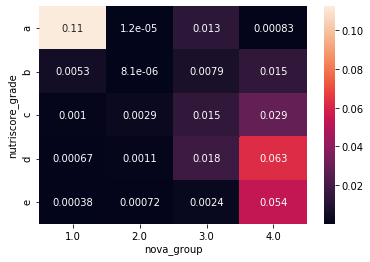

In [5]:
# NutriScore NutriGrade
    #Afficher le tableau de contingence 
X = 'nutriscore_grade'
Y = 'nova_group'

data = df

c = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name='Total')
c

    #Afficher heat map

tx = c.loc[:,['Total']]
ty = c.loc[['Total'],:]
n = len(data)
indep = tx.dot(ty) / n

#c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=table.iloc[:-1,:-1])
plt.show()

In [6]:
import scipy.stats as st

st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(c)

In [7]:
# chi2
st_chi2

79549.38362238492

In [8]:
# degrés de liberté
st_dof

20

In [9]:
# p-value
st_p

0.0

In [10]:
# Tableau des fréquences attendues
st_exp

array([[  6064.64933151,    726.77878948,  13926.19601136,
         37099.37586764,  57817.        ],
       [  4655.08540193,    557.85869032,  10689.42789817,
         28476.62800958,  44379.        ],
       [  7783.54530667,    932.76879282,  17873.28032979,
         47614.40557072,  74204.        ],
       [ 11814.72192357,   1415.85915826,  27130.0324773 ,
         72274.38644087, 112635.        ],
       [  7340.99803632,    879.7345691 ,  16857.06328338,
         44907.20411119,  69985.        ],
       [ 37659.        ,   4513.        ,  86476.        ,
        230372.        , 359020.        ]])

### Recherche d'une corrélation entre 'nutriscore_score' et 'nova_group'

ANOVA

- H0 = nutriscore_score et nova_group sont indépendants 

- H1 = nutriscore_score et nova_group sont corrélés

In [11]:
# Définir un df pour le test

# Enlever les lignes pour lesquelles 'nutriscore_score' est NaN
#how='any' : if one of the named columns have a missing value
df_bis = df.dropna(subset=['nutriscore_score', 'nova_group'], how='any')

# Vérification de la taille du df 
df_bis.shape

(359020, 40)

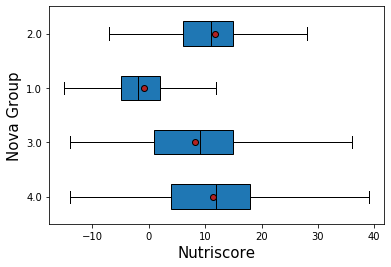

In [12]:
# Définir les variables
X = 'nova_group' # qualitative
Y = 'nutriscore_score' # quantitative

# Définir le sous echantillon testé
sous_echantillon = df_bis[['nutriscore_score', 'nova_group']]


# Définir les vecteurs du test 
vecteur_a = sous_echantillon[sous_echantillon[X]==1.0].nutriscore_score.to_numpy()
vecteur_b = sous_echantillon[sous_echantillon[X]==2.0].nutriscore_score.to_numpy()
vecteur_c = sous_echantillon[sous_echantillon[X]==3.0].nutriscore_score.to_numpy()
vecteur_d = sous_echantillon[sous_echantillon[X]==4.0].nutriscore_score.to_numpy()

# Définir les classes du test 
modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
        groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

# Propriétés graphiques     
medianprops = {'color':'black'}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

# Axe des x
plt.xlabel('Nutriscore', size=15)

# Axe des y
plt.ylabel('Nova Group', size=15)

plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.show()

In [13]:
# Calculer eta carré (eta squared)

# Créer fonction 
def eta_squared(x,y):
        moyenne_y = y.mean()
        classes = []
        for classe in x.unique():
            yi_classe = y[x==classe]
            classes.append({'ni': len(yi_classe),
                            'moyenne_classe': yi_classe.mean()})
        SCT = sum([(yj-moyenne_y)**2 for yj in y])
        SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
        return SCE/SCT

eta_squared(sous_echantillon[X],sous_echantillon[Y])

0.17420136155567237

In [14]:
st_p = st.f_oneway(vecteur_a, vecteur_b, vecteur_c, vecteur_d)

# p-value
st_p

F_onewayResult(statistic=25244.683594243317, pvalue=0.0)

In [15]:
# Significativité

import scipy.stats as st
from scipy.stats import f_oneway

stat, p = f_oneway(vecteur_a, vecteur_b, vecteur_c, vecteur_d)

alpha = 0.05

# Déterminer si l'hypothèse est valide en fonction de la p-value
print('stat=%.3f, p=%.3f' % (stat, p))
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

stat=25244.684, p=0.000
Different distributions (reject H0)


### Créer un score combinant le nutriscore_grade et le nova_group

In [16]:
# Afficher les valeurs que peut prendre le 'nutriscore_grade'

df['nutriscore_grade'].unique()

array(['e', 'd', 'a', 'c', nan, 'b'], dtype=object)

In [17]:
# Remplacer les valeurs des grades du 'nutriscore_grade' par des valeurs numériques

df['nutriscore_grade'].replace(['a', 'b', 'c', 'd', 'e'], 
                               [0, 1, 2, 3, 4], inplace=True)

In [18]:
# Création du score par sommation de la valeur du 'nova_group' et de celle du 'nutriscore_grade'

df['warning_score'] = df.loc[:,['nutriscore_grade','nova_group']].sum(axis=1)

df.sample(5)

,code,product_name,quantity,packaging,brands,categories,labels,countries,allergens,serving_size,serving_quantity,additives_n,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,main_category,main_category_en,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,warning_score
545840,2272937003418,Pollo asado,NaN,NaN,NaN,NaN,NaN,en:es,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,187.0,782.0,10.80,2.80,NaN,NaN,0.10,0.1,NaN,22.20,0.7800,0.312,NaN,NaN,NaN,NaN,NaN,0.0
803172,0027331000905,Sopes,NaN,NaN,NaN,Mexican Dinner Mixes,NaN,United States,NaN,1 PIECE (62 g),62.0,5.0,-4.0,0.0,4.0,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...","Ole Mexican Foods, Inc.",en:mexican-dinner-mixes,Mexican-dinner-mixes,202.0,845.0,1.61,1.61,0.0,0.0,33.87,0.0,4.8,3.23,0.0800,0.032,0.0,0.001,0.032,0.00116,-4.0,4.0
453106,8712400102131,Olvarit fruits d'été,4 x 100 g,NaN,Olvarit,NaN,NaN,en:BE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,54.0,226.0,0.20,0.05,NaN,NaN,11.52,9.9,NaN,0.50,0.0050,0.002,NaN,NaN,NaN,NaN,NaN,0.0
538798,0686207401040,Brownie au chocolat,100 g,"box,individually wrapped",Simply protein,"Dietary supplements, Bodybuilding supplements,...","Vegetarian,No GMOs,Vegan,Gluten-free,Non GMO p...",Canada,en:soybeans,20 g,20.0,2.0,1.0,1.0,4.0,unknown,unknown,"en:to-be-checked, en:complete, en:nutrition-fa...","en:to-be-checked,en:complete,en:nutrition-fact...","To be checked,Complete,Nutrition facts complet...",NaN,en:protein-bars,Protein bars,350.0,1464.0,7.50,2.00,0.0,0.0,60.00,10.0,4.0,20.00,0.8125,0.325,0.0,0.000,0.020,0.00108,1.0,5.0
76339,3660902550606,Délice de Légumes et Langoustines,400 g,"Conserve,Boîte,Métal",La Pointe de Penmarc'h,NaN,NaN,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,NaN,29.0,121.0,0.10,0.10,NaN,NaN,2.50,0.9,NaN,4.80,0.9000,0.360,NaN,NaN,NaN,NaN,NaN,0.0


### Analyses univariées du 'warning_score'

In [19]:
# Mesure de Tendance Centrale
print('moy:\n',df['warning_score'].mean())
print('med:\n',df['warning_score'].median())
print('mod:\n',df['warning_score'].mode())
    
# Mesure de Dispersion 
print("var:\n",df['warning_score'].var(ddof=0))
print("ect:\n",df['warning_score'].std(ddof=0))
    
# Mesure de Forme 
print("skw:\n",df['warning_score'].skew())
print("kur:\n",df['warning_score'].kurtosis())

moy:
 2.672068197048327
med:
 2.0
mod:
 0    0.0
dtype: float64
var:
 8.119219035174142
ect:
 2.8494243339969816
skw:
 0.5112294567892349
kur:
 -1.2518721907808266


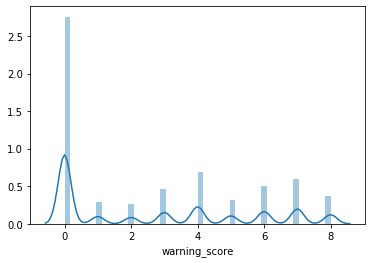

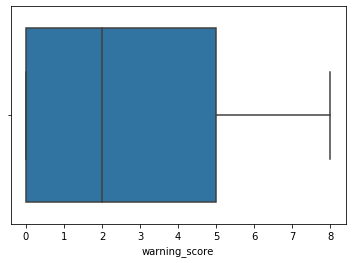

In [20]:
# Observation de la distribution du 'warning_score'

plt.figure()
sns.distplot(df['warning_score'])

plt.figure()
sns.boxplot(df['warning_score'])

Observations : La distribution du warning score n'est pas normale et il serait intéressant de standardiser les données. 

### Analyses bivariées avec le 'warning_score'

#### Recherche d'une corrélation entre le 'warning_score' et le 'pnns_groups_1'

- H0 = warning_score et pnns_groups_1 sont indépendants 

- H1 = warning_score et pnns_groups_1 sont corrélés

In [21]:
# Définir un df pour le test
# Enlever les lignes pour lesquelles 'nutriscore_score' est NaN
#how='any' : if one of the named columns have a missing value
df_bis2 = df.dropna(subset=['warning_score', 'pnns_groups_1'], how='any')

# Vérification de la taille du df 
df_bis2.shape

(961123, 41)

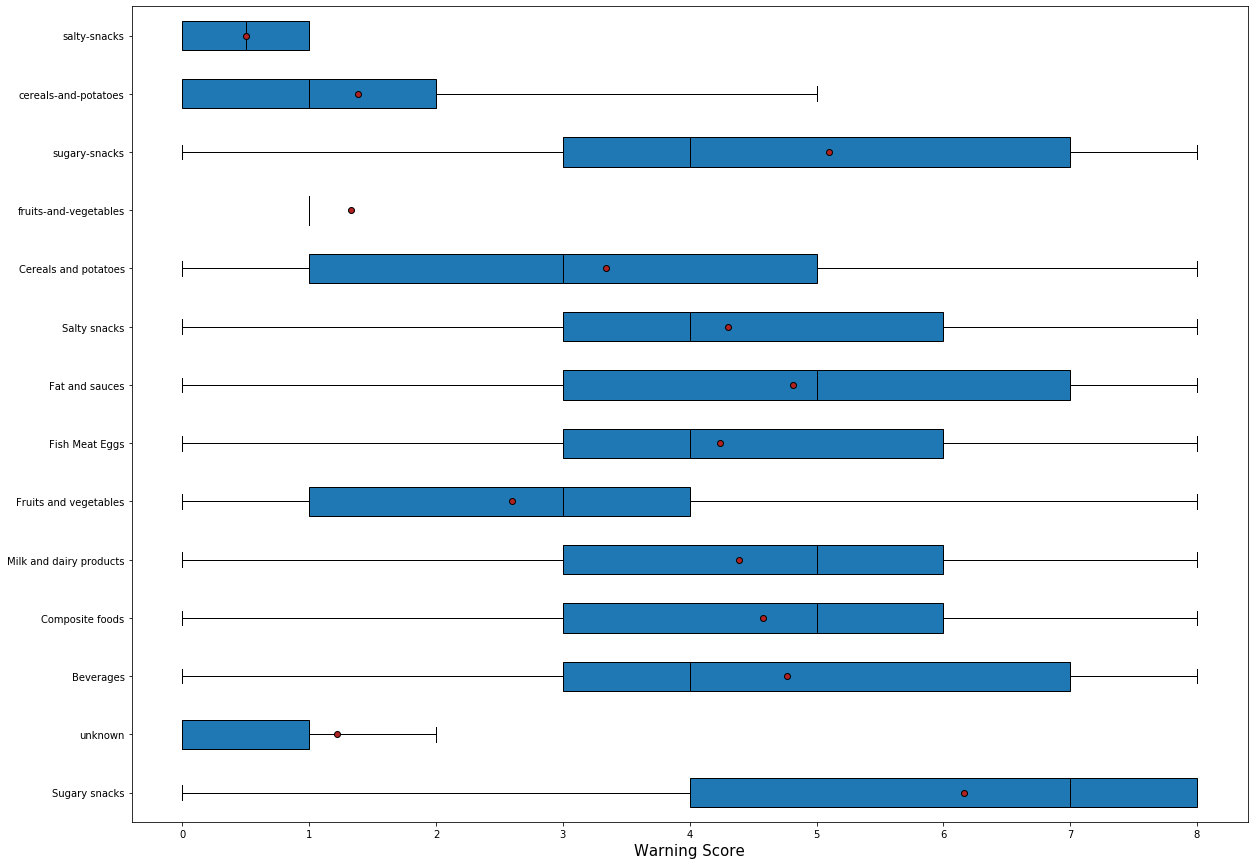

In [22]:
# Définir les varibles
X = 'pnns_groups_1' # qualitative
Y = 'warning_score' # quantitative

# Définir le sous echantillon testé
sous_echantillon = df_bis2[['warning_score', 'pnns_groups_1']]

# Taille
plt.figure(figsize=(20,15))

# Définir les vecteurs du test 
vecteur_a = sous_echantillon[sous_echantillon[X]=='Sugary snacks'].warning_score.to_numpy()
vecteur_b = sous_echantillon[sous_echantillon[X]=='Milk and dairy products'].warning_score.to_numpy()
vecteur_c = sous_echantillon[sous_echantillon[X]=='Cereals and potatoes'].warning_score.to_numpy()
vecteur_d = sous_echantillon[sous_echantillon[X]=='Fish Meat Eggs'].warning_score.to_numpy()
vecteur_e = sous_echantillon[sous_echantillon[X]=='Fat and sauces'].warning_score.to_numpy()
vecteur_f = sous_echantillon[sous_echantillon[X]=='Composite foods'].warning_score.to_numpy()
vecteur_g = sous_echantillon[sous_echantillon[X]=='Beverages'].warning_score.to_numpy()
vecteur_h = sous_echantillon[sous_echantillon[X]=='Fruits and vegetables'].warning_score.to_numpy()
vecteur_i = sous_echantillon[sous_echantillon[X]=='Salty snacks'].warning_score.to_numpy()
vecteur_j = sous_echantillon[sous_echantillon[X]=='fruits-and-vegetables'].warning_score.to_numpy()
vecteur_k = sous_echantillon[sous_echantillon[X]=='sugary-snacks'].warning_score.to_numpy()
vecteur_l = sous_echantillon[sous_echantillon[X]=='cereals-and-potatoes'].warning_score.to_numpy()
vecteur_m = sous_echantillon[sous_echantillon[X]=='salty-snacks'].warning_score.to_numpy()
vecteur_n = sous_echantillon[sous_echantillon[X]=='unknown'].warning_score.to_numpy()


# Définir les classes du test 
modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
        groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

# Propriétés graphiques   
medianprops = {'color':'black'}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}   

# Axe des x
plt.xlabel('Warning Score', size=15)

plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.show()

In [23]:
#Calculer eta carré (eta squared)

eta_squared(sous_echantillon[X],sous_echantillon[Y])

0.3948376913364021

In [24]:
st_p = st.f_oneway(vecteur_a, vecteur_b, vecteur_c, vecteur_d, 
                   vecteur_e, vecteur_f, vecteur_g, vecteur_h,
                  vecteur_i, vecteur_j, vecteur_k, vecteur_l, 
                  vecteur_m, vecteur_n)

# p-value
st_p

F_onewayResult(statistic=48236.526256113044, pvalue=0.0)

In [25]:
# Significativité

stat, p = f_oneway(vecteur_a, vecteur_b, vecteur_c, vecteur_d, 
                   vecteur_e, vecteur_f, vecteur_g, vecteur_h,
                  vecteur_i, vecteur_j, vecteur_k, vecteur_l, 
                  vecteur_m, vecteur_n)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

stat=48236.526, p=0.000
Different distributions (reject H0)


In [26]:
st_p = st.f_oneway(vecteur_a, vecteur_b, vecteur_c, vecteur_d, vecteur_e, vecteur_f, vecteur_g)

# p-value
st_p

F_onewayResult(statistic=10858.654860057723, pvalue=0.0)

#### Recherche d'une corrélation entre le 'warning_score' et le 'pnns_groups_2'

- H0 = warning_score et pnns_groups_1 sont indépendants 

- H1 = warning_score et pnns_groups_1 sont corrélés

In [27]:
# Définir un df pour le test
# Enlever les lignes pour lesquelles 'nutriscore_score' est NaN
#how='any' : if one of the named columns have a missing value
df_bis3 = df.dropna(subset=['warning_score', 'pnns_groups_2'], how='any')

# Vérification de la taille du df 
df_bis3.shape

(962505, 41)

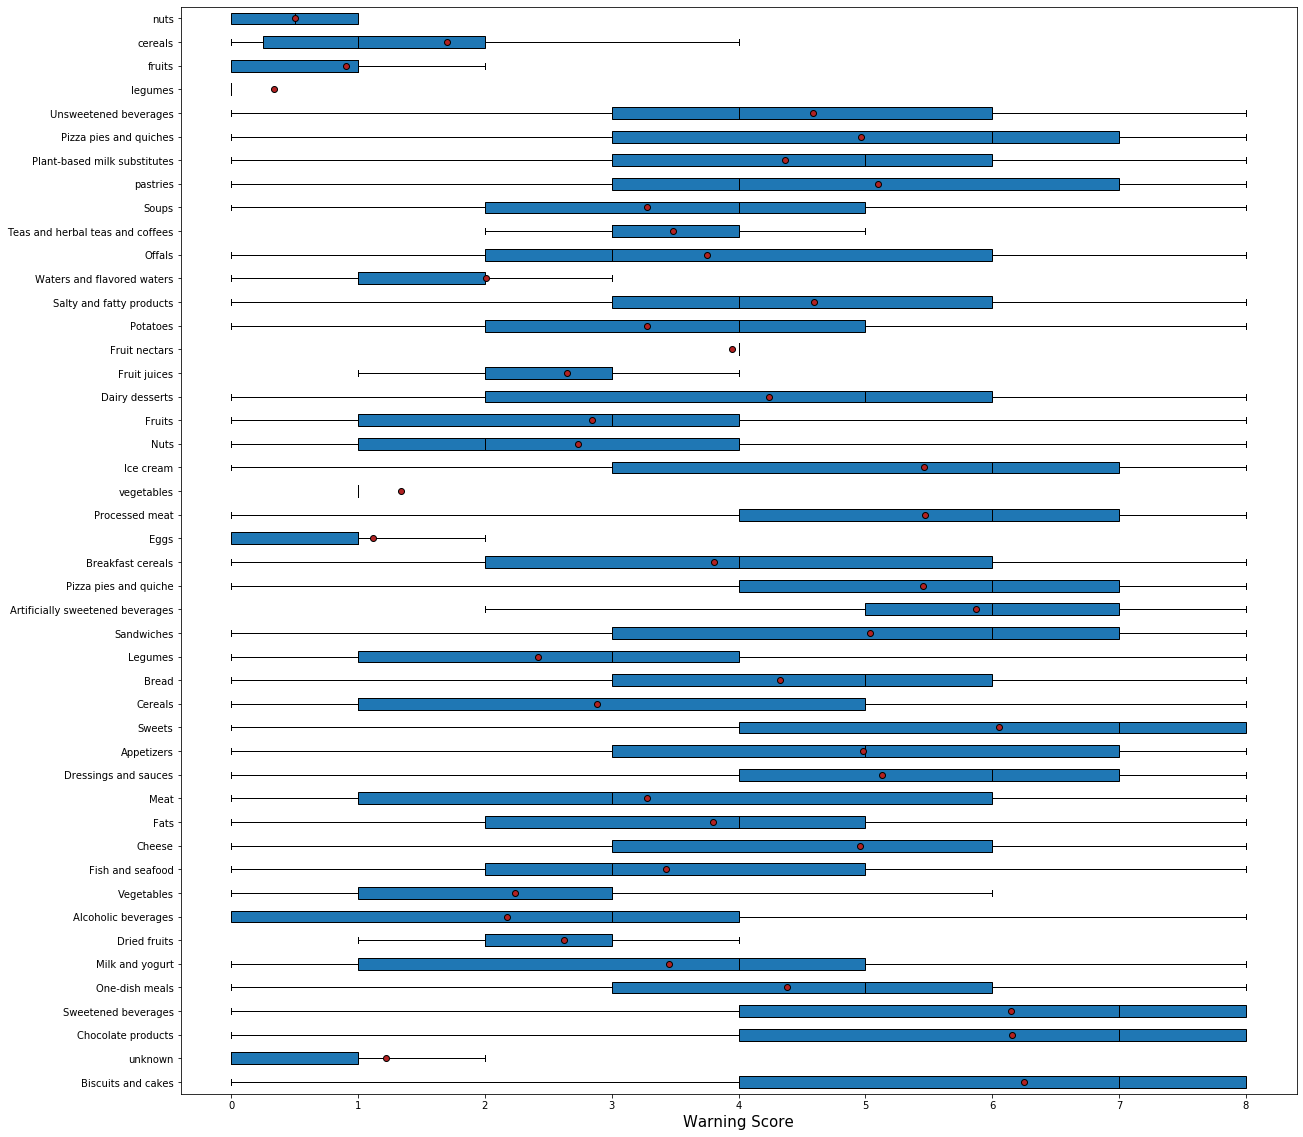

In [28]:
# Définir les varibles
X = 'pnns_groups_2' # qualitative
Y = 'warning_score' # quantitative

# Définir le sous echantillon testé
sous_echantillon = df_bis3[['warning_score', 'pnns_groups_2']]

# Taille
plt.figure(figsize=(20,20))

# Définir les vecteurs du test 
vecteur_1 = sous_echantillon[sous_echantillon[X]=='Biscuits and cakes '].warning_score.to_numpy()
vecteur_2 = sous_echantillon[sous_echantillon[X]=='Sweets'].warning_score.to_numpy()
vecteur_3 = sous_echantillon[sous_echantillon[X]=='Dressings and sauces'].warning_score.to_numpy()
vecteur_4 = sous_echantillon[sous_echantillon[X]=='Cheese'].warning_score.to_numpy()
vecteur_5 = sous_echantillon[sous_echantillon[X]=='One-dish meals'].warning_score.to_numpy()
vecteur_6 = sous_echantillon[sous_echantillon[X]=='Cereals'].warning_score.to_numpy()
vecteur_7 = sous_echantillon[sous_echantillon[X]=='Processed meat'].warning_score.to_numpy()
vecteur_8 = sous_echantillon[sous_echantillon[X]=='Milk and yogurt'].warning_score.to_numpy()
vecteur_9 = sous_echantillon[sous_echantillon[X]=='Fish and seafood '].warning_score.to_numpy()
vecteur_10 = sous_echantillon[sous_echantillon[X]=='Bread'].warning_score.to_numpy()
vecteur_11 = sous_echantillon[sous_echantillon[X]=='Fruits'].warning_score.to_numpy()
vecteur_12 = sous_echantillon[sous_echantillon[X]=='Vegetables'].warning_score.to_numpy()
vecteur_13 = sous_echantillon[sous_echantillon[X]=='Meat'].warning_score.to_numpy()
vecteur_14 = sous_echantillon[sous_echantillon[X]=='Sweetened beverages'].warning_score.to_numpy()
vecteur_15 = sous_echantillon[sous_echantillon[X]=='Fats'].warning_score.to_numpy()
vecteur_16 = sous_echantillon[sous_echantillon[X]=='Chocolate products'].warning_score.to_numpy()
vecteur_17 = sous_echantillon[sous_echantillon[X]=='Appetizers'].warning_score.to_numpy()
vecteur_18 = sous_echantillon[sous_echantillon[X]=='Unsweetened beverages'].warning_score.to_numpy()
vecteur_19 = sous_echantillon[sous_echantillon[X]=='Salty and fatty products'].warning_score.to_numpy()
vecteur_20 = sous_echantillon[sous_echantillon[X]=='Legumes'].warning_score.to_numpy()
vecteur_21 = sous_echantillon[sous_echantillon[X]=='Pizza pies and quiche'].warning_score.to_numpy()
vecteur_22 = sous_echantillon[sous_echantillon[X]=='vegetables '].warning_score.to_numpy()
vecteur_23 = sous_echantillon[sous_echantillon[X]=='Breakfast cereals'].warning_score.to_numpy()
vecteur_24 = sous_echantillon[sous_echantillon[X]=='Fruit juices'].warning_score.to_numpy()
vecteur_25 = sous_echantillon[sous_echantillon[X]=='Nuts'].warning_score.to_numpy()
vecteur_26 = sous_echantillon[sous_echantillon[X]=='Plant-based milk substitutes'].warning_score.to_numpy()
vecteur_27 = sous_echantillon[sous_echantillon[X]=='Ice cream'].warning_score.to_numpy()
vecteur_28 = sous_echantillon[sous_echantillon[X]=='Artificially sweetened beverages'].warning_score.to_numpy()
vecteur_29 = sous_echantillon[sous_echantillon[X]=='Dried fruits'].warning_score.to_numpy()
vecteur_30 = sous_echantillon[sous_echantillon[X]=='Dairy desserts'].warning_score.to_numpy()
vecteur_31 = sous_echantillon[sous_echantillon[X]=='pastries'].warning_score.to_numpy()
vecteur_32 = sous_echantillon[sous_echantillon[X]=='Sandwiches'].warning_score.to_numpy()
vecteur_33 = sous_echantillon[sous_echantillon[X]=='Soups'].warning_score.to_numpy()
vecteur_34 = sous_echantillon[sous_echantillon[X]=='Potatoes'].warning_score.to_numpy()
vecteur_35 = sous_echantillon[sous_echantillon[X]=='Eggs'].warning_score.to_numpy()
vecteur_36 = sous_echantillon[sous_echantillon[X]=='Waters and flavored waters'].warning_score.to_numpy()
vecteur_37 = sous_echantillon[sous_echantillon[X]=='Alcoholic beverages'].warning_score.to_numpy()
vecteur_38 = sous_echantillon[sous_echantillon[X]=='Fruit nectars'].warning_score.to_numpy()
vecteur_39 = sous_echantillon[sous_echantillon[X]=='Teas and herbal teas and coffees'].warning_score.to_numpy()
vecteur_40 = sous_echantillon[sous_echantillon[X]=='Offals'].warning_score.to_numpy()
vecteur_41 = sous_echantillon[sous_echantillon[X]=='fruits'].warning_score.to_numpy()
vecteur_42 = sous_echantillon[sous_echantillon[X]=='cereals'].warning_score.to_numpy()
vecteur_43 = sous_echantillon[sous_echantillon[X]=='legumes'].warning_score.to_numpy()
vecteur_44 = sous_echantillon[sous_echantillon[X]=='nuts'].warning_score.to_numpy()
vecteur_45 = sous_echantillon[sous_echantillon[X]=='unknown'].warning_score.to_numpy()

# Définir les classes du test
modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
        groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':'black'}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

# Axe des x
plt.xlabel('Warning Score', size=15)

plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.show()

In [29]:
#Calculer eta carré (eta squared)
    
eta_squared(sous_echantillon[X],sous_echantillon[Y])

0.42371939245766843

In [30]:
st_p = st.f_oneway(vecteur_1, vecteur_2, vecteur_3, vecteur_4, vecteur_5,
                   vecteur_6, vecteur_7, vecteur_8, vecteur_9, vecteur_10,
                  vecteur_11, vecteur_12, vecteur_13, vecteur_14, vecteur_15,
                   vecteur_16, vecteur_17, vecteur_18, vecteur_19, vecteur_20, 
                  vecteur_21, vecteur_22, vecteur_23, vecteur_24, vecteur_25,
                   vecteur_26, vecteur_27, vecteur_28, vecteur_29, vecteur_30, 
                  vecteur_31, vecteur_32, vecteur_33, vecteur_34, vecteur_35,
                   vecteur_36, vecteur_37, vecteur_38, vecteur_39, vecteur_40, 
                   vecteur_41, vecteur_42, vecteur_43, vecteur_44, vecteur_45
                  )

# p-value
st_p

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:3339: RuntimeWarning: invalid value encountered in double_scalars
  ssbn += _square_of_sums(a - offset) / len(a)


F_onewayResult(statistic=nan, pvalue=nan)

In [31]:
# Significativité

stat, p = f_oneway(vecteur_1, vecteur_2, vecteur_3, vecteur_4, vecteur_5,
                   vecteur_6, vecteur_7, vecteur_8, vecteur_9, vecteur_10,
                  vecteur_11, vecteur_12, vecteur_13, vecteur_14, vecteur_15,
                   vecteur_16, vecteur_17, vecteur_18, vecteur_19, vecteur_20, 
                  vecteur_21, vecteur_22, vecteur_23, vecteur_24, vecteur_25,
                   vecteur_26, vecteur_27, vecteur_28, vecteur_29, vecteur_30, 
                  vecteur_31, vecteur_32, vecteur_33, vecteur_34, vecteur_35,
                   vecteur_36, vecteur_37, vecteur_38, vecteur_39, vecteur_40, 
                   vecteur_41, vecteur_42, vecteur_43, vecteur_44, vecteur_45
                  )

print('stat=%.3f, p=%.3f' % (stat, p))
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

stat=nan, p=nan
Different distributions (reject H0)


## Hypothèse 2 :

- H0 = rapport fat sat+trans /fat total et nutriscore sont indépendants 

- H1 = rapport fat sat+trans /fat total et nutriscore sont corrélés

Si rapport (saturated-fat + trans-fat )/fat total n'est pas corrélé avec le nutriscore, il serait intéressant de rajouter ce calcul.
Le nutriscore prend en compte les sucres et les graisses. 
Cependant, le ratio (saturated-fat + trans-fat )/fat total a été observé comme fortement corrélés à l'apparition de maladies cardiovasculaires.

Proposition d’application liée : 
Application qui calcule le ratio d’AG saturés ou avec des insaturations de type trans- sur le poids total en lipides

Colonnes d’intérêt : 
'saturated-fat_100g', 'trans-fat_100g', 'fat_100g', 'nutriscore_score', 'nutriscore_grade' 

### Nettoyage

Variable 'trans_fat'

In [32]:
trans_fat_ = (df['trans-fat_100g'] <= 100) & (df['trans-fat_100g'] >= 0)

df = df[trans_fat_]
df.sample(4)

,code,product_name,quantity,packaging,brands,categories,labels,countries,allergens,serving_size,serving_quantity,additives_n,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,main_category,main_category_en,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,warning_score
833931,0099482486129,California sun-dried raisins,NaN,NaN,NaN,Snacks,NaN,United States,NaN,1/4 cup (40 g),40.0,0.0,2.0,1.0,1.0,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...","Whole Foods Market, Inc.",en:snacks,Snacks,300.0,1255.0,0.00,0.00,0.0,0.000,77.50,65.00,5.0,2.50,0.0625,0.025,NaN,NaN,0.000,0.00175,2.0,2.0
641637,0044529144623,White dipping cheese,NaN,NaN,Dairyfood Usa Inc.,"Dairies, Fermented foods, Fermented milk produ...",NaN,United States,NaN,2 Tbsp (28 g),28.0,1.0,18.0,3.0,4.0,Milk and dairy products,Cheese,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...","Dairyfood USA, Inc.",en:cheeses,Cheeses,250.0,1046.0,21.43,14.29,0.0,0.054,3.57,0.00,0.0,14.29,3.1250,1.250,0.000804,0.0,0.536,0.00000,18.0,7.0
840375,0698997810407,Lemon streusel gluten free muffins,NaN,NaN,NaN,NaN,NaN,United States,NaN,1 MUFFIN (71 g),71.0,5.0,NaN,NaN,4.0,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",Pinnacle Foods Group LLC,NaN,NaN,338.0,1414.0,12.68,3.52,0.0,0.077,50.70,26.76,0.0,2.82,0.9500,0.380,NaN,NaN,0.000,0.00056,NaN,4.0
793576,0011110027634,Raw cashews,NaN,NaN,NaN,Snacks,NaN,United States,en:nuts,1/4 cup (28 g),28.0,0.0,2.0,1.0,1.0,unknown,unknown,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NOT A BRANDED ITEM,en:snacks,Snacks,571.0,2389.0,42.86,7.14,0.0,0.000,28.57,7.14,3.6,17.86,0.0000,0.000,NaN,NaN,0.000,0.00643,2.0,2.0


In [33]:
df.shape

(251543, 41)

In [34]:
# Valeur des trans-fat doit être inférieur ou égal à valeu des fat

trans_fat = df['trans-fat_100g'] <= df['fat_100g']
df = df[trans_fat]
df.shape

(251510, 41)

In [35]:
# Valeur des fat doit être supérieur ou égal 
# à la somme des valeur des saturated-fat et des trans-fat

fat_tot = (df['saturated-fat_100g'] + df['trans-fat_100g']) <= df['fat_100g']
df = df[fat_tot]  
df.shape

(251462, 41)

In [36]:
# Créer des colonnes avec le ratio de nutriment présent dans l'aliment

df['saturated_fat'] = df['saturated-fat_100g']/100
df['trans_fat'] = df['trans-fat_100g']/100
df['fat'] = df['fat_100g']/100

In [37]:
# Ajouter une colonne au df avec le calcul du rapport fat unsat/fat sat

def ratio_fat(df):
    if df['fat'].any() == 0: 
        df['unhealthy_cardio_ratio'] = 0
    else : 
        df['unhealthy_cardio_ratio'] = (df['saturated_fat'] + df['trans_fat'])/df['fat']

ratio_fat(df)

In [38]:
df.sample(4)

,code,product_name,quantity,packaging,brands,categories,labels,countries,allergens,serving_size,serving_quantity,additives_n,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,main_category,main_category_en,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,warning_score,saturated_fat,trans_fat,fat,unhealthy_cardio_ratio
682539,0827048061059,Sharp Cheddar Cheese Ball,NaN,NaN,Panos Brands Llc,"Dairies, Fermented foods, Fermented milk produ...",NaN,United States,NaN,2 Tbsp (28 g),28.0,2.0,18.0,3.0,4.0,Milk and dairy products,Cheese,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",PANOS Brands LLC,en:cheeses,Cheeses,357.0,1494.0,25.00,14.29,0.0,0.071,14.29,10.71,0.0,17.86,1.6975,0.679,0.000214,0.0,0.536,0.00129,18.0,7.0,0.1429,0.0,0.2500,0.5716
812132,0741643048393,Diced pears,NaN,NaN,NaN,"Plant-based foods and beverages, Plant-based f...",NaN,United States,NaN,1 BOWL (113 g),113.0,1.0,-3.0,0.0,4.0,Fruits and vegetables,Fruits,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...","Lowe's Food Stores, Inc.",en:canned-fruits,Canned fruits,71.0,297.0,0.00,0.00,0.0,0.000,17.70,14.16,1.8,0.00,0.0000,0.000,NaN,NaN,0.000,0.00000,-3.0,4.0,0.0000,0.0,0.0000,NaN
831220,0042608160021,Apple cider vinegar,NaN,NaN,NaN,"Groceries, Sauces",NaN,United States,NaN,1 Tbsp (15 ml),15.0,0.0,0.0,1.0,NaN,Fat and sauces,Dressings and sauces,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...","Florida Bottling Company, Inc.",en:sauces,Sauces,0.0,0.0,0.00,0.00,0.0,0.000,0.00,0.00,0.0,0.00,0.0000,0.000,NaN,NaN,0.000,0.00000,0.0,1.0,0.0000,0.0,0.0000,NaN
667525,0092227754125,"Amylu, Breakfast Chicken Sausage, Harvest Apple",NaN,NaN,Atk Foods Inc.,"Meats, Prepared meats, Sausages",NaN,United States,NaN,2 LINKS (56 g),56.0,1.0,12.0,3.0,3.0,Fish Meat Eggs,Processed meat,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...","ATK Foods, Inc.",en:sausages,Sausages,196.0,820.0,6.25,0.89,0.0,0.080,12.50,10.71,1.8,17.86,2.0975,0.839,0.000054,0.0,0.000,0.00129,12.0,6.0,0.0089,0.0,0.0625,0.1424


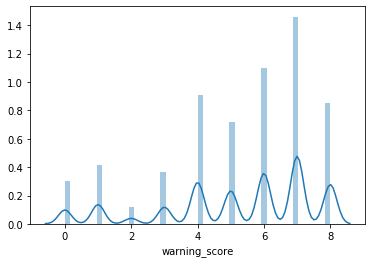

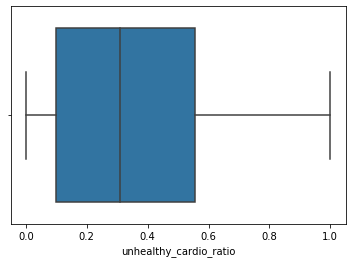

In [39]:
# Observer la distribution du 'unhealthy_cardio_ratio'

plt.figure()
sns.distplot(df['warning_score'])

plt.figure()
sns.boxplot(df['unhealthy_cardio_ratio'])

plt.show()

Observations : La distribution du unhealthy cardio ratio n'est pas normale et il serait intéressant de standardiser les données. 

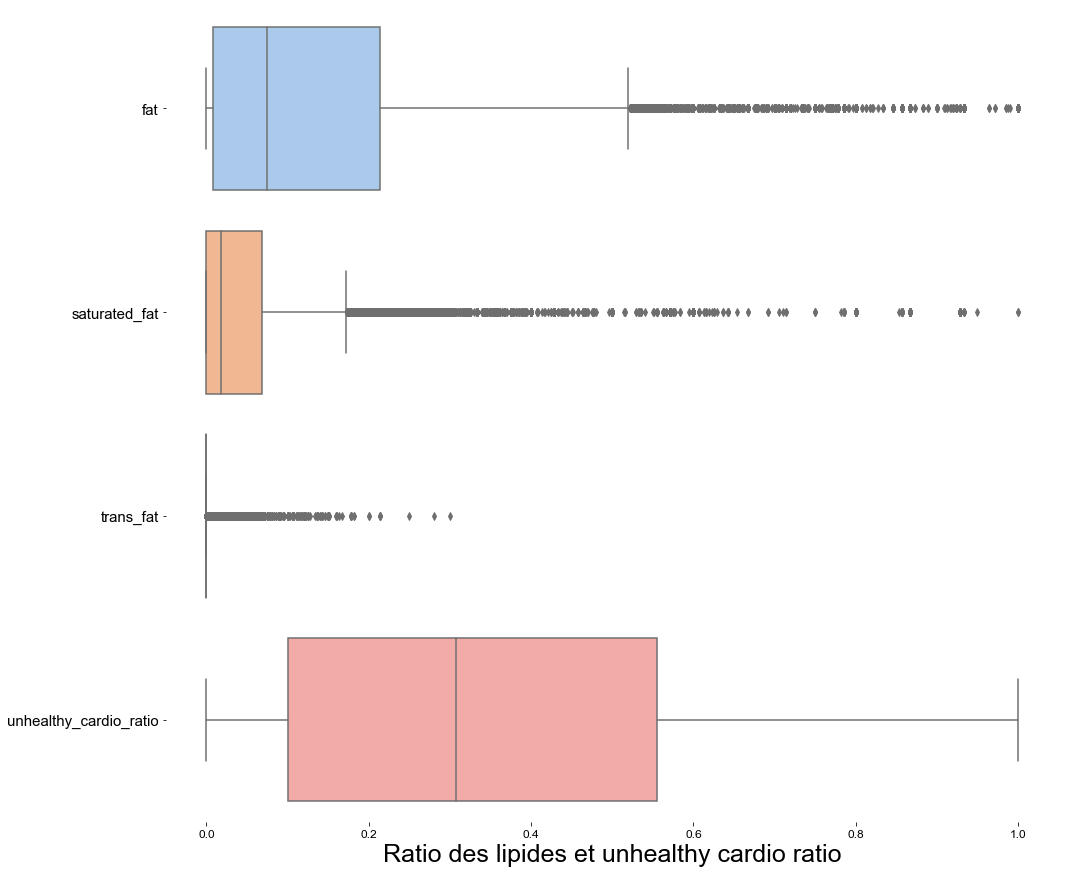

In [40]:
# Observer la distribution des ratio 
# des différents types de lipides et du 'unhealthy_cardio_ratio'
# dans seaborn

# Liste des colonnes d'intérêt 
lipides_et_ratio = ['fat', 'saturated_fat', 'trans_fat', 'unhealthy_cardio_ratio']

# Taille
plt.subplots(figsize=(16, 15))

# Style 
sns.set_style('whitegrid')

# Couleurs
sns.set_color_codes('pastel')

# Figure
ax = sns.boxplot(data=df[lipides_et_ratio],orient="h", palette='pastel')
    
# Titre en bas / x label
plt.xlabel('Ratio des lipides et unhealthy cardio ratio', size=25)

# Taille des labels x
ax.set(xlim=None, ylabel='')
ax.tick_params(axis='x', labelsize=12)
    
# Taille des labels y 
ax.tick_params(axis='y', labelsize=15)
sns.despine(left=True, bottom=True)

### Rechercher une corrélation entre le unhealthy_cardio_ratio et le novascore

#### Rechercher une corrélation entre 'unhealthy_cardio_ratio' et 'novascore_score'

Diagramme de dispersion

- H0 = nutriscore_score et unhealthy_cardio_ratio sont indépendants 

- H1 = nutriscore_score et unhealthy_cardio_ratio sont corrélés

In [41]:
# Définir un df pour le test

# Enlever les lignes pour lesquelles 'code' ou 'url' est NaN
#how='any' : if one of the named columns have a missing value
df_ter = df.dropna(subset=['unhealthy_cardio_ratio', 'nutriscore_score'], how='any')


# Vérification de la taille du df 
df_ter.shape

(176498, 45)

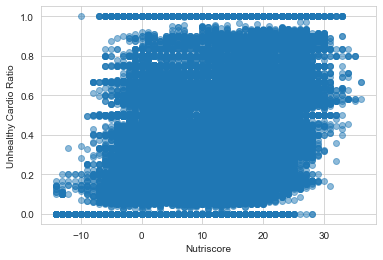

In [42]:
# Diagramme de dispersion

plt.plot(df_ter['nutriscore_score'],df_ter['unhealthy_cardio_ratio'],'o',alpha=0.5)

# Labels des axes 
plt.xlabel('Nutriscore')
plt.ylabel('Unhealthy Cardio Ratio')

plt.show()

In [43]:
# Calcul du Coefficient de Pearson et de la Covariance Empirique

import scipy.stats as st

# Coefficient de Pearson
print(st.pearsonr(df_ter['nutriscore_score'],df_ter['unhealthy_cardio_ratio'])[0])

# Covariance Empirique
print(np.cov(df_ter['nutriscore_score'],df_ter['unhealthy_cardio_ratio'],ddof=0)[1,0])

0.4837499174887893
1.1016458465038865


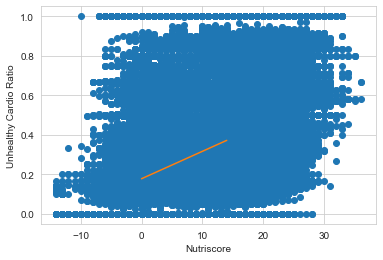

In [44]:
# Droite de régression associée

# Estimer a et b de la fonction définissant la régression linéaire
import statsmodels.api as sm
Y = df_ter['unhealthy_cardio_ratio']
X = df_ter[['nutriscore_score']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['nutriscore_score'],result.params['intercept']

# Afficher la droite de régression linéaire par dessus le graphique de régression linéaire
plt.plot(df_ter['nutriscore_score'],df_ter['unhealthy_cardio_ratio'], "o")
plt.plot(np.arange(15),[a*x+b for x in np.arange(15)])

plt.xlabel('Nutriscore')
plt.ylabel('Unhealthy Cardio Ratio')

plt.show()

#### Rechercher une corrélation entre 'unhealthy_cardio_ratio' et 'novascore_grade'

ANOVA

- H0 = novascore_grade et unhealthy_cardio_ratio sont indépendants 

- H1 = novascore_grade et unhealthy_cardio_ratio sont corrélés

In [45]:
# Définir un df pour le test

# Enlever les lignes pour lesquelles 'code' ou 'url' est NaN
#how='any' : if one of the named columns have a missing value
df_quad = df.dropna(subset=['unhealthy_cardio_ratio', 'nutriscore_grade'], how='any')

# Vérification de la taille du df 
df_quad.shape

(176498, 45)

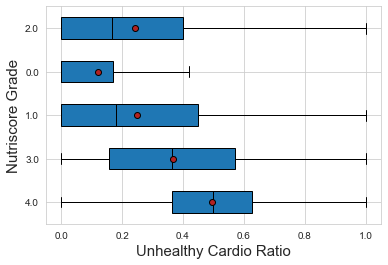

In [46]:
# Définir les variables
X = 'nutriscore_grade' # qualitative
Y = 'unhealthy_cardio_ratio' # quantitative

# Définir le sous echantillon testé
sous_echantillon = df_quad[['nutriscore_grade', 'unhealthy_cardio_ratio']]

# Définir les vecteurs du test 
vecteur_a = sous_echantillon[sous_echantillon[X]==0.0].unhealthy_cardio_ratio.to_numpy()
vecteur_b = sous_echantillon[sous_echantillon[X]==1.0].unhealthy_cardio_ratio.to_numpy()
vecteur_c = sous_echantillon[sous_echantillon[X]==2.0].unhealthy_cardio_ratio.to_numpy()
vecteur_d = sous_echantillon[sous_echantillon[X]==3.0].unhealthy_cardio_ratio.to_numpy()
vecteur_e = sous_echantillon[sous_echantillon[X]==4.0].unhealthy_cardio_ratio.to_numpy()

# Définir les classes du test 
modalites = sous_echantillon[X].unique()
groupes = []
for m in modalites:
        groupes.append(sous_echantillon[sous_echantillon[X]==m][Y])

# Propriétés graphiques  
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

# Axe des x
plt.xlabel('Unhealthy Cardio Ratio', size=15)

# Axe des y
plt.ylabel('Nutriscore Grade', size=15)
    
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.show()

In [47]:
# Calculer eta carré (eta squared)

eta_squared(sous_echantillon[X],sous_echantillon[Y])

0.22254811166850344

In [48]:
st_p = st.f_oneway(vecteur_a, vecteur_b, vecteur_c, vecteur_d, vecteur_e)

# p-value
st_p

F_onewayResult(statistic=12630.422686670277, pvalue=0.0)

In [49]:
# Significativité

stat, p = f_oneway(vecteur_a, vecteur_b, vecteur_c, vecteur_d, vecteur_e)

print('stat=%.3f, p=%.3f' % (stat, p))
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

stat=12630.423, p=0.000
Different distributions (reject H0)
